<h2 style="font-weight: 700; text-align: center">Histogram Stretching</h2>

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#### Importing subject image as a grayscale image

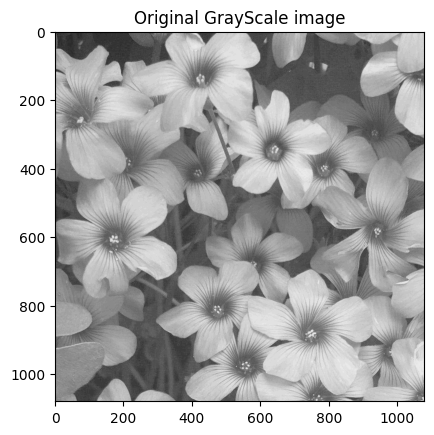

In [2]:
img = cv.imread("./Low Contrast.jpg")
imgg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imgg = imgg[:1080, :1080]
plt.title("Original GrayScale image")
plt.imshow(imgg, cmap="gray")
plt.show()

#### Utility Function - Matplotting the output(s)

In [3]:
def matplot_images(*imgs, titles):
  fig = plt.figure(figsize=(12, 7))
  columns = len(imgs)
  for i in range(columns):
    fig.add_subplot(1, columns, i + 1)
    plt.imshow(imgs[i], cmap="gray")
    plt.title(titles[i])
  plt.show()

#### Histogram plotting functions

In [4]:
def show_hist(img):
  count = {}
  for x in range(img.shape[0]):
    for y in range(img.shape[1]):
      if (p := img[x][y]) in count.keys():
        count[p] += 1
      else:
        count.update({p : 1})
  plt.figure(figsize=(15, 7))
  plt.bar(list(count.keys()), list(count.values()))
  plt.show()

#### Histogram Plot for the input image

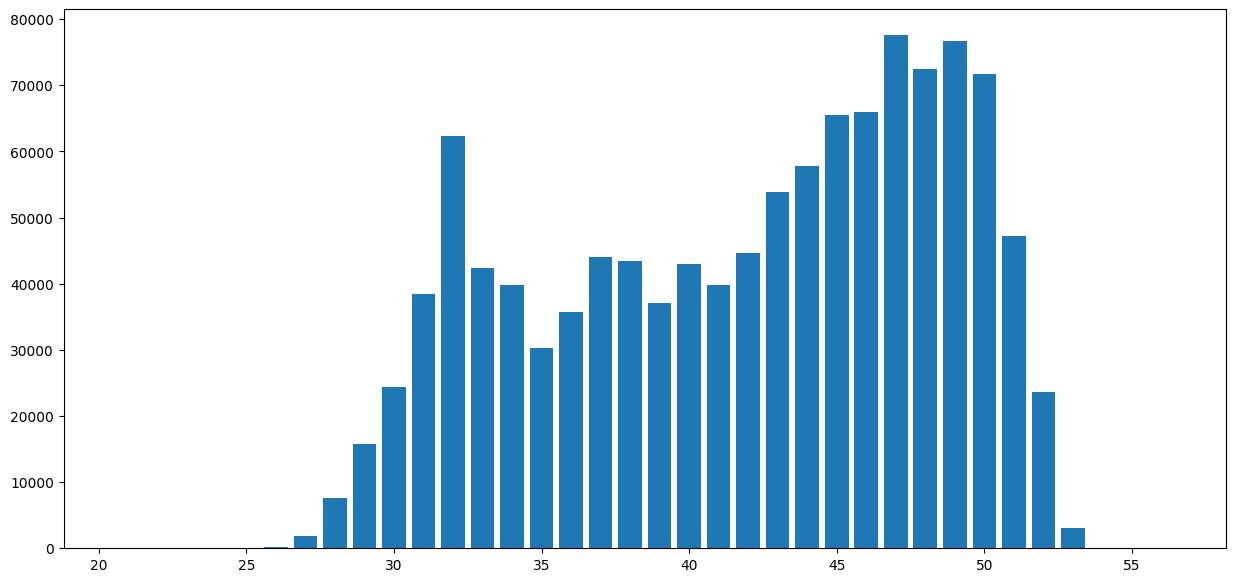

Maximum Pixel Value in Input: 56 Minimum Pixel Value in Input: 21


In [5]:
show_hist(imgg)
rmax, rmin = max(map(max, imgg)), min(map(min, imgg))
print(f"Maximum Pixel Value in Input: {rmax} Minimum Pixel Value in Input: {rmin}")

#### Histogram Stretching

In [6]:
def histogram_stretching(img, smax, smin, rmax, rmin):
  stretched_img = [[0 for _ in range(img.shape[1])] for _ in range(img.shape[0])]
  for x in range(img.shape[0]):
    for y in range(img.shape[1]):
      stretched_img[x][y] = int((((smax - smin) / (rmax - rmin)) * (img[x][y] - rmin)) + smin)
      
  return np.array(stretched_img)

#### Callers

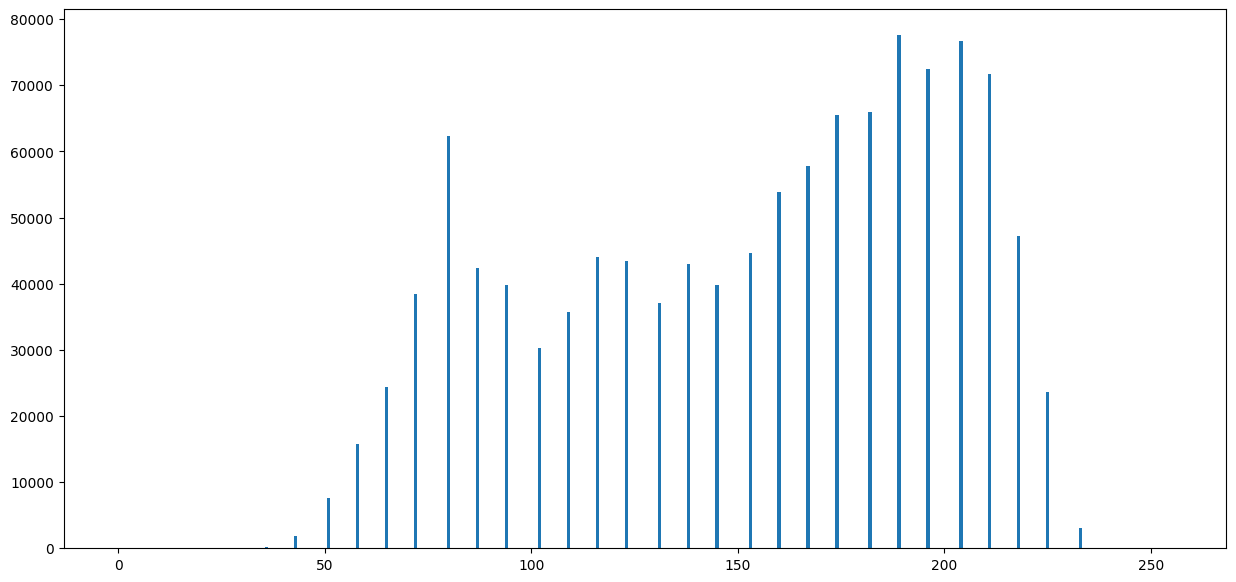

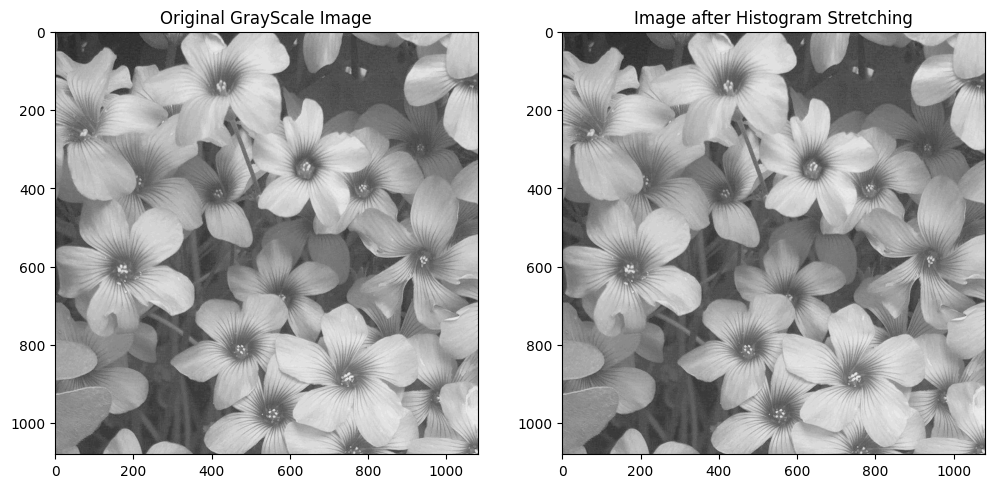

In [7]:
stretched = histogram_stretching(imgg, 255, 0, rmax, rmin)
show_hist(stretched)
matplot_images(imgg, stretched, titles=["Original GrayScale Image", "Image after Histogram Stretching"])

#### Observations

In [8]:
smax, smin = max(map(max, stretched)), min(map(min, stretched))
print(f"Minimum Pixel Value in Input: {rmin} Maximum Pixel Value in Input: {rmax}")
print(f"Minimum Pixel Value in Output: {smin} Maximum Pixel Value in Output: {smax}")

Maximum Pixel Value in Output: 255 Minimum Pixel Value in Output: 0


#### Conclusion

- The histogram of the image pixel values is **expanded** (stretched) over a larger range of frequencies while **maintaining the shape** using Histogram Stretching. 